## COVID-19 plotting mortality rates

This notebook shows a comparison of how the mortality rates of different countries stack.

Mortality rates give a better representation of the incidence of the disease in the country than the number of detected cases, since the number of detected also depends on the number of screenings done. Mortality rates due to COVID-19 on the other hand can be taken as an unbiased estimator of the penetration of the disease.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = [20, 10]

In [2]:
#Data provided by CSSE at Johns Hopkins University
#https://github.com/CSSEGISandData/COVID-19
cv=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
cv=cv.groupby('Country/Region').sum()
cv=cv.drop(columns=['Lat', 'Long'])
cv=cv.T

### Historical plot

This is how the counts stack if we look at each country by date

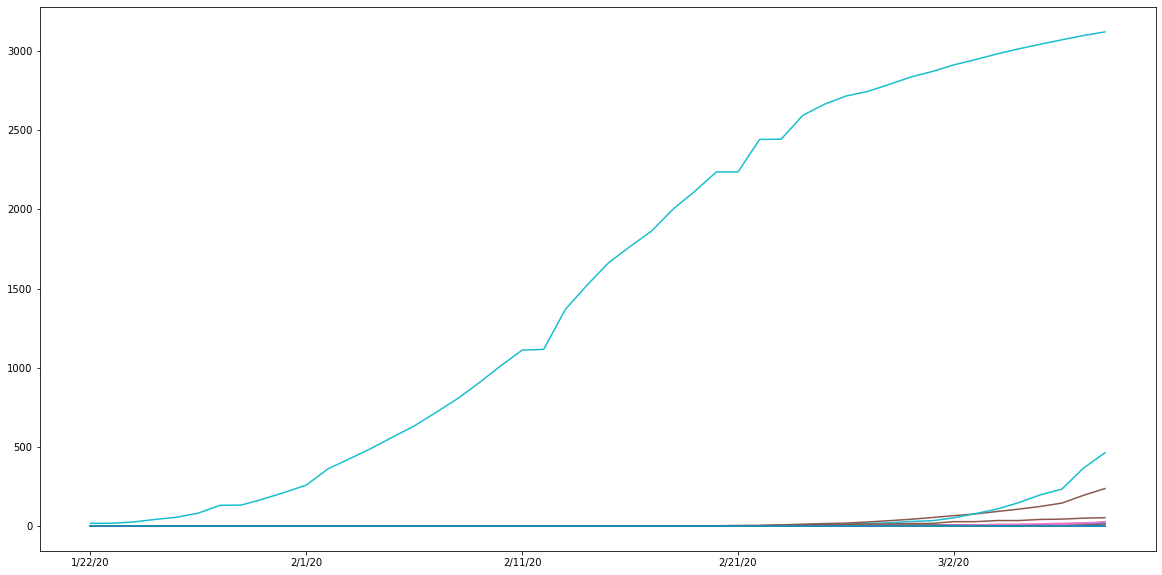

In [3]:
#No legend for readability. 
cv.plot.line(legend=None)

### Adjusted plot by incidence

The historical plot does not give a good idea from of how the growth rates stack for the different countries, since the spread does not start equally in every place.

You can align all the countries by the date in which they reach a critical number (here called `centering_number`)

In [4]:
centering_number=10

a=cv.T.values.tolist()
b=[]
for country in a:
    idx=0
    for e,day in enumerate(country):
        if day>centering_number:
            idx=e
            b.append(country[e:])
            break
        
        if e==len(country)-1:
            b.append([])
        
overlapped=pd.DataFrame(b)
overlapped.index=cv.columns
overlapped=overlapped.dropna(how='all').T

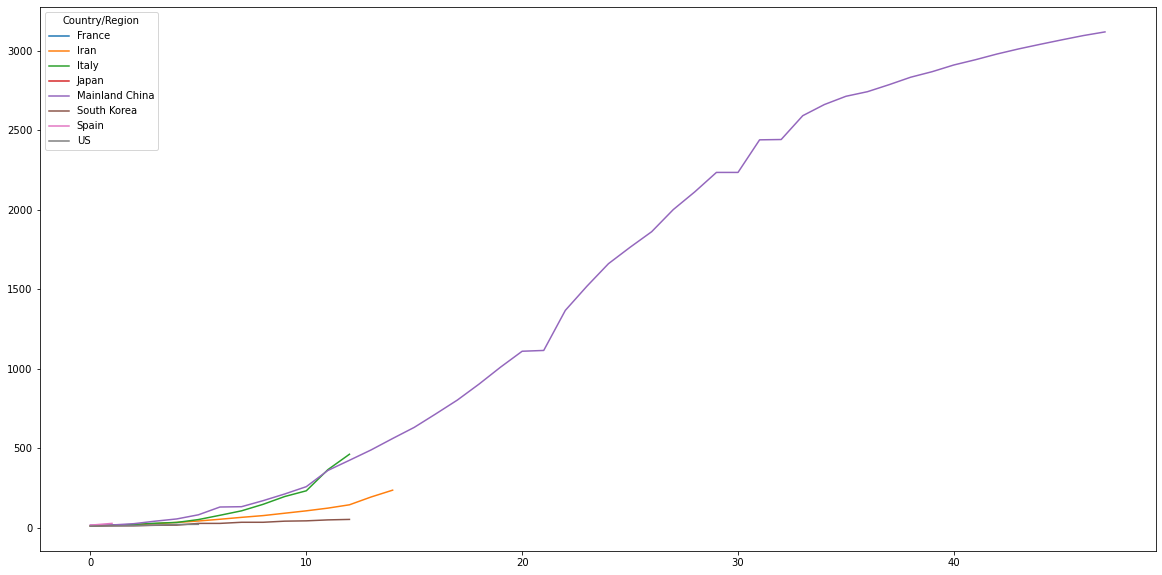

In [5]:
overlapped.plot.line()

Removing China for a closer inspection

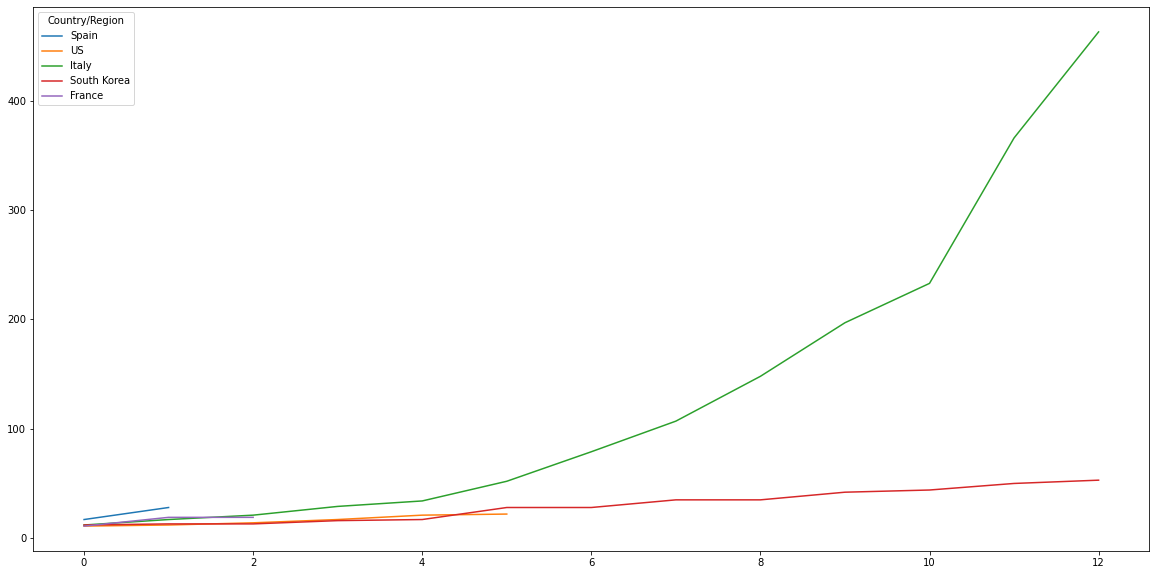

In [7]:
overlapped[['Spain','US','Italy','South Korea','France']].plot.line()